Pesos dos neurônios após o treinamento (2 grupos):
[[ 0.53280978 -0.58116563  1.        ]
 [-0.59093802  0.45016725  0.04141811]]


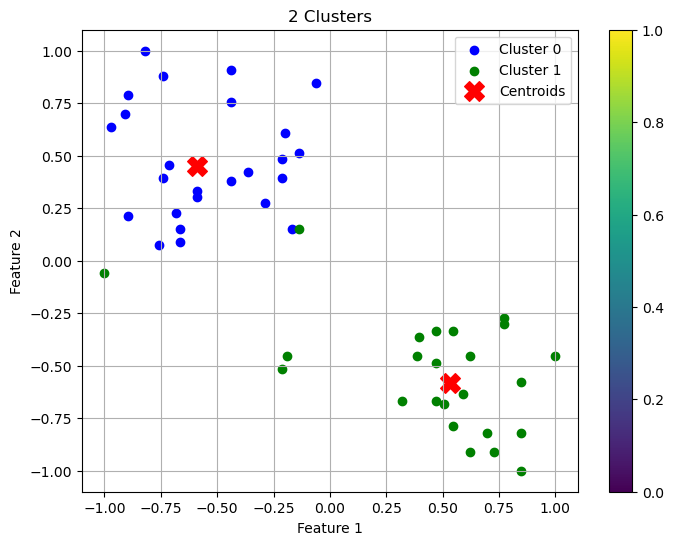

Pesos dos neurônios após o treinamento (3 grupos):
[[-0.56248135  0.4572649   0.03972559]
 [ 0.99435415  0.9206706   0.40870177]
 [ 0.52049815 -0.55546885  1.        ]]


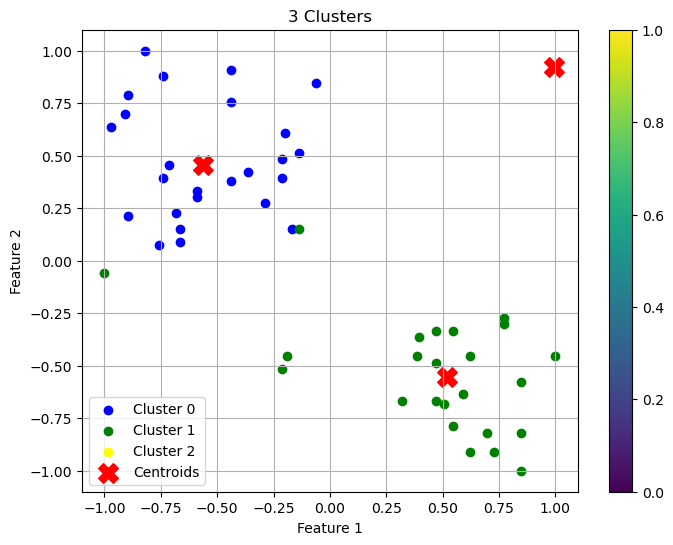

In [9]:
import numpy as np
import matplotlib.pyplot as plt

class VectorQuantificacao:
    def __init__(self, input_size, num_neurons, learning_rate=0.1, num_epochs=100):
        self.input_size = input_size
        self.num_neurons = num_neurons
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs

        # Inicialização dos pesos dos neurônios
        self.weights = np.random.rand(num_neurons, input_size)
      
        
    def train(self, data):
        for epoch in range(self.num_epochs):
            for x in data:
                # Encontre o neurônio vencedor (o mais próximo do ponto de entrada)
                winner_index = self._find_winner(x)

                # Atualize os pesos do neurônio vencedor
                self.weights[winner_index] += self.learning_rate * (x - self.weights[winner_index])
                
    def _find_winner(self, x):
        # Calcule as distâncias entre o ponto de entrada e os pesos de todos os neurônios
        distances = np.linalg.norm(self.weights - x, axis=1)
        
        # Encontre o índice do neurônio com a menor distância (o vencedor)
        winner_index = np.argmin(distances)
        return winner_index

def plot_clusters(data, centroids, title, colors):
    plt.figure(figsize=(8, 6))
    for i, color in enumerate(colors):
        cluster_data = data[np.where(data[:, -1] == i)]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=color, label=f'Cluster {i}')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.colorbar()
    plt.show()

# Carrega o conjunto de dados de entrada de um arquivo .dat
def load_data(file_path):
    data = np.loadtxt(file_path)
    return data

# Define o caminho para o arquivo de dados
file_path_2_clusters = r'D:\UBI Courses\Inteligencia Computacional\f1\exemplo2.dat'
file_path_3_clusters = r'D:\UBI Courses\Inteligencia Computacional\f1\exemplo2.dat'

# Carrega os conjuntos de dados de entrada
data_2_clusters = load_data(file_path_2_clusters)
data_3_clusters = load_data(file_path_3_clusters)

# Cria e treina o vetor quantizado com 2 grupos
vq_2_clusters = VectorQuantificacao(input_size=3, num_neurons=2, learning_rate=0.1, num_epochs=100)
vq_2_clusters.train(data_2_clusters)

# Imprime os pesos dos neurônios após o treinamento
print("Pesos dos neurônios após o treinamento (2 grupos):")
print(vq_2_clusters.weights)

# Visualiza os resultados com Matplotlib
colors_2_clusters = ['blue', 'green']  # Definindo cores distintas para 2 clusters
plot_clusters(data_2_clusters, vq_2_clusters.weights, '2 Clusters', colors_2_clusters)

# Cria e treina o vetor quantizado com 3 grupos
vq_3_clusters = VectorQuantificacao(input_size=3, num_neurons=3, learning_rate=0.01, num_epochs=100)
vq_3_clusters.train(data_3_clusters)

# Imprime os pesos dos neurônios após o treinamento
print("Pesos dos neurônios após o treinamento (3 grupos):")
print(vq_3_clusters.weights)

# Visualiza os resultados com Matplotlib
colors_3_clusters = ['blue', 'green', 'yellow']  # Definindo cores distintas para 3 clusters
plot_clusters(data_3_clusters, vq_3_clusters.weights, '3 Clusters', colors_3_clusters)


